In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df = pd.read_csv("bds.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2436 entries, 0 to 2435
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ngay_dang            2435 non-null   object 
 1   loai_hinh            2435 non-null   object 
 2   dien_tich            2435 non-null   object 
 3   gia                  2435 non-null   object 
 4   giay_to_phap_ly      2127 non-null   object 
 5   so_phong_ngu         1425 non-null   float64
 6   so_phong_ve_sinh     1320 non-null   float64
 7   tinh_trang_noi_that  1400 non-null   object 
 8   link                 2436 non-null   object 
dtypes: float64(2), object(7)
memory usage: 171.4+ KB


In [3]:
df.rename(columns={
    'ngay_dang': 'Ng√†y ƒëƒÉng',
    'loai_hinh': 'Lo·∫°i h√¨nh',
    'dien_tich': 'Di·ªán t√≠ch (m¬≤)',
    'gia': 'Gi√° (t·ª∑)',
    'giay_to_phap_ly': 'Gi·∫•y t·ªù ph√°p l√Ω',
    'so_phong_ngu': 'S·ªë ph√≤ng ng·ªß',
    'so_phong_ve_sinh': 'S·ªë ph√≤ng v·ªá sinh',
    'tinh_trang_noi_that': 'T√¨nh tr·∫°ng n·ªôi th·∫•t',
    'link': 'Link'
}, inplace=True)
df.head()

Ng√†y ƒëƒÉng                                          Lo·∫°i h√¨nh  \
0  09/10/2025          Chung c∆∞ mini, cƒÉn h·ªô d·ªãch v·ª• t·∫°i ƒë∆∞·ªùng 1   
1  21/10/2025        Chung c∆∞ mini, cƒÉn h·ªô d·ªãch v·ª• t·∫°i ƒë∆∞·ªùng 10A   
2  21/10/2025        Chung c∆∞ mini, cƒÉn h·ªô d·ªãch v·ª• t·∫°i ƒë∆∞·ªùng 10B   
3  21/10/2025        Chung c∆∞ mini, cƒÉn h·ªô d·ªãch v·ª• t·∫°i ƒë∆∞·ªùng 13B   
4  18/10/2025  Chung c∆∞ mini, cƒÉn h·ªô d·ªãch v·ª• t·∫°i ƒë∆∞·ªùng An D∆∞∆°...   

  Di·ªán t√≠ch (m¬≤) Gi√° (t·ª∑)   Gi·∫•y t·ªù ph√°p l√Ω  S·ªë ph√≤ng ng·ªß  S·ªë ph√≤ng v·ªá sinh  \
0          49 m¬≤  1,55 t·ª∑    S·ªï ƒë·ªè/ S·ªï h·ªìng           2.0               1.0   
1          37 m¬≤  1,79 t·ª∑    S·ªï ƒë·ªè/ S·ªï h·ªìng           2.0               NaN   
2          43 m¬≤  1,77 t·ª∑    S·ªï ƒë·ªè/ S·ªï h·ªìng           2.0               NaN   
3          37 m¬≤  1,68 t·ª∑           ƒë·∫ßy ƒë·ªß.           2.0               NaN   
4          40 m¬≤  1,42 t·ª∑  H·ª£p ƒë·ªìng mua b√°n           1.0               1.0   

  T√¨nh tr·∫°ng n·ªôi th·∫•t                                               Link  
0              C∆° b·∫£n  https://batdongsan.com.vn/ban-can-ho-chung-cu-...  
1              ƒê·∫ßy ƒë·ªß  https://batdongsan.com.vn/ban-can-ho-chung-cu-...  
2              ƒê·∫ßy ƒë·ªß  https://batdongsan.com.vn/ban-can-ho-chung-cu-...  
3              ƒë·∫ßy ƒë·ªß  https://batdongsan.com.vn/ban-can-ho-chung-cu-...  
4              ƒê·∫ßy ƒë·ªß  https://batdongsan.com.vn/ban-can-ho-chung-cu-...

In [4]:
df = df.dropna(thresh=4)
df.shape

(2435, 9)

# X·ª≠ l√Ω d·ªØ li·ªáu

## Lo·∫°i h√¨nh nh√†

In [5]:
def clean_property_type(value):
    text = str(value).lower().strip()

    if "nh√† m·∫∑t ph·ªë" in text:
        return "Nh√† m·∫∑t ph·ªë"
    
    elif "chung c∆∞" in text or "cƒÉn h·ªô" in text or "apartment" in text:
        return "Chung c∆∞"

    elif "shophouse" in text or "nh√† ph·ªë th∆∞∆°ng m·∫°i" in text:
        return "Shophouse"

    elif "bi·ªát th·ª±" in text or "villa" in text:
        return "Bi·ªát th·ª±"

    elif "nh√† ri√™ng" in text:
        return "Nh√† ri√™ng"
    
    else:
        return "Kh√°c"

In [6]:
df['Lo·∫°i h√¨nh'] = df['Lo·∫°i h√¨nh'].apply(clean_property_type)
df['Lo·∫°i h√¨nh'].value_counts()

Lo·∫°i h√¨nh
Nh√† m·∫∑t ph·ªë    705
Shophouse      699
Nh√† ri√™ng      690
Chung c∆∞       341
Name: count, dtype: int64

## Di·ªán t√≠ch

In [7]:
def convert_area(value):
    text = str(value).lower().replace("m¬≤", "").replace("m2", "").strip()
    text = text.replace(",", ".")
    match = re.search(r'\d+(\.\d+)?', text)
    if not match:
        return np.nan
    
    num = float(match.group())
    return num

In [8]:
df["Di·ªán t√≠ch (m¬≤)"] = df["Di·ªán t√≠ch (m¬≤)"].apply(convert_area)
print(df["Di·ªán t√≠ch (m¬≤)"].value_counts())

Di·ªán t√≠ch (m¬≤)
50.0     127
100.0    111
75.0      71
40.0      70
60.0      69
        ... 
155.2      1
82.3       1
247.0      1
73.8       1
654.0      1
Name: count, Length: 427, dtype: int64


## Gi√° nh√†

In [9]:
def convert_price(value):
    text = str(value).lower().strip()
    text = text.replace(",", ".")
    match = re.search(r'\d+(\.\d+)?', text)
    if not match:
        return np.nan

    num = float(match.group())

    # ƒê·ªïi tri·ªáu sang t·ª∑
    if "tri·ªáu" in text:
        num = num / 1000  
    elif "t·ª∑" in text or "ty" in text:
        num = num 
    else:
        num = num / 1000

    return round(num, 2) 

In [10]:
df["Gi√° (t·ª∑)"] = df["Gi√° (t·ª∑)"].apply(convert_price)
print(df["Gi√° (t·ª∑)"].value_counts())

Gi√° (t·ª∑)
32.00    21
18.00    20
13.50    20
36.00    18
12.50    18
         ..
16.75     1
46.79     1
26.82     1
10.67     1
3.20      1
Name: count, Length: 699, dtype: int64


## Gi·∫•y t·ªù ph√°p l√Ω

In [11]:
def clean_text(text):
    if pd.isna(text):
        return np.nan
    text = str(text).lower()
    text = re.sub(r'[.,;!]', '', text)  # x√≥a d·∫•u ch·∫•m, ph·∫©y
    text = text.strip()
    return text

# √Åp d·ª•ng l√†m s·∫°ch
df['Gi·∫•y t·ªù ph√°p l√Ω'] = df['Gi·∫•y t·ªù ph√°p l√Ω'].apply(clean_text)
df['Gi·∫•y t·ªù ph√°p l√Ω']

0         s·ªï ƒë·ªè/ s·ªï h·ªìng
1         s·ªï ƒë·ªè/ s·ªï h·ªìng
2         s·ªï ƒë·ªè/ s·ªï h·ªìng
3                 ƒë·∫ßy ƒë·ªß
4       h·ª£p ƒë·ªìng mua b√°n
              ...       
2431                 NaN
2432    h·ª£p ƒë·ªìng mua b√°n
2433    h·ª£p ƒë·ªìng mua b√°n
2434      s·ªï ƒë·ªè/ s·ªï h·ªìng
2435      s·ªï ƒë·ªè/ s·ªï h·ªìng
Name: Gi·∫•y t·ªù ph√°p l√Ω, Length: 2435, dtype: object

In [12]:
def categorize_legal(doc):
    if pd.isna(doc):
        return "Kh√¥ng r√µ"
    if "s·ªï ƒë·ªè/ s·ªï h·ªìng" in doc:
        return "S·ªï ƒë·ªè/ S·ªï h·ªìng"
    elif "s·ªï ƒë·ªè" in doc:
        return "S·ªï ƒë·ªè"
    elif "s·ªï h·ªìng" in doc:
        return "S·ªï h·ªìng"
    elif "h·ª£p ƒë·ªìng mua b√°n" in doc:
        return "H·ª£p ƒë·ªìng mua b√°n"
    elif "ch·ªù s·ªï" in doc:
        return "ƒêang ch·ªù s·ªï"
    elif "gi·∫•y ph√©p x√¢y d·ª±ng" in doc or "pccc" in doc:
        return "ƒê·∫ßy ƒë·ªß ph√°p l√Ω kh√°c"
    else:
        return "Kh√°c"  
df['Gi·∫•y t·ªù ph√°p l√Ω'] = df['Gi·∫•y t·ªù ph√°p l√Ω'].apply(categorize_legal)
df['Gi·∫•y t·ªù ph√°p l√Ω'].value_counts()

Gi·∫•y t·ªù ph√°p l√Ω
S·ªï ƒë·ªè/ S·ªï h·ªìng         1569
Kh√¥ng r√µ                308
S·ªï ƒë·ªè                   232
H·ª£p ƒë·ªìng mua b√°n        182
Kh√°c                    100
S·ªï h·ªìng                  22
ƒêang ch·ªù s·ªï              18
ƒê·∫ßy ƒë·ªß ph√°p l√Ω kh√°c       4
Name: count, dtype: int64

## Ph√≤ng ng·ªß

In [13]:
df["S·ªë ph√≤ng ng·ªß"] = df["S·ªë ph√≤ng ng·ªß"].round().astype("Int64")
mean_bed = round(df["S·ªë ph√≤ng ng·ªß"].mean(skipna=True))
df["S·ªë ph√≤ng ng·ªß"].fillna(mean_bed, inplace=True)

C:\Users\QHy\AppData\Local\Temp\ipykernel_31220\2842862189.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["S·ªë ph√≤ng ng·ªß"].fillna(mean_bed, inplace=True)


In [14]:
df["S·ªë ph√≤ng ng·ªß"].value_counts().head()

S·ªë ph√≤ng ng·ªß
6    1144
4     268
2     236
3     202
5     177
Name: count, dtype: Int64

## Ph√≤ng v·ªá sinh

In [15]:
df["S·ªë ph√≤ng v·ªá sinh"] = df["S·ªë ph√≤ng v·ªá sinh"].round().astype("Int64")
mean_wc  = round(df["S·ªë ph√≤ng v·ªá sinh"].mean(skipna=True))
df["S·ªë ph√≤ng v·ªá sinh"].fillna(mean_wc , inplace=True)

C:\Users\QHy\AppData\Local\Temp\ipykernel_31220\3885926590.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["S·ªë ph√≤ng v·ªá sinh"].fillna(mean_wc , inplace=True)


In [16]:
df["S·ªë ph√≤ng v·ªá sinh"].value_counts().head()

S·ªë ph√≤ng v·ªá sinh
6    1192
4     280
1     253
5     168
3     160
Name: count, dtype: Int64

## T√¨nh tr·∫°ng n·ªôi th·∫•t

In [17]:
df["T√¨nh tr·∫°ng n·ªôi th·∫•t"].value_counts()

T√¨nh tr·∫°ng n·ªôi th·∫•t
ƒê·∫ßy ƒë·ªß                                                    776
C∆° b·∫£n                                                    346
Kh√¥ng n·ªôi th·∫•t                                            129
Full n·ªôi th·∫•t                                              32
ƒë·∫ßy ƒë·ªß                                                     23
                                                         ... 
cao c·∫•p Luxuryk kh√°ch mua c√≥ th·ªÉ cho thu√™ ho·∫∑c ·ªü lu√¥n.      1
B√†n giao ho√†n thi·ªán m·∫∑t ngo√†i, th√¥ b√™n trong                1
Ho√†n thi·ªán m·∫∑t ngo√†i, b√™n trong b√†n giao th√¥                1
nh·∫≠p kh·∫©u ch√¢u √Çu ƒë·∫≥ng c·∫•p.                                 1
B√†n giao th√¥.                                               1
Name: count, Length: 71, dtype: int64

In [18]:
def clean_interior(value):
    if pd.isna(value):
        return "Kh√¥ng r√µ"
    
    text = str(value).lower().strip()

    if "ƒë·∫ßy ƒë·ªß" in text or "full" in text or "ƒë·ªß n·ªôi th·∫•t" in text or "full ƒë·ªì" in text:
        return "ƒê·∫ßy ƒë·ªß"
    elif "c∆° b·∫£n" in text:
        return "C∆° b·∫£n"
    elif "kh√¥ng" in text and "n·ªôi th·∫•t" in text:
        return "Kh√¥ng n·ªôi th·∫•t"
    elif "th√¥" in text or "b√†n giao th√¥" in text:
        return "B√†n giao th√¥"
    else:
        return "Kh√°c"
    

In [19]:
df["T√¨nh tr·∫°ng n·ªôi th·∫•t"] = df["T√¨nh tr·∫°ng n·ªôi th·∫•t"].apply(clean_interior)
df["T√¨nh tr·∫°ng n·ªôi th·∫•t"].value_counts()

T√¨nh tr·∫°ng n·ªôi th·∫•t
Kh√¥ng r√µ          1035
ƒê·∫ßy ƒë·ªß             845
C∆° b·∫£n             359
Kh√¥ng n·ªôi th·∫•t     130
Kh√°c                59
B√†n giao th√¥         7
Name: count, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2435 entries, 0 to 2435
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ng√†y ƒëƒÉng            2435 non-null   object 
 1   Lo·∫°i h√¨nh            2435 non-null   object 
 2   Di·ªán t√≠ch (m¬≤)       2435 non-null   float64
 3   Gi√° (t·ª∑)             2112 non-null   float64
 4   Gi·∫•y t·ªù ph√°p l√Ω      2435 non-null   object 
 5   S·ªë ph√≤ng ng·ªß         2435 non-null   Int64  
 6   S·ªë ph√≤ng v·ªá sinh     2435 non-null   Int64  
 7   T√¨nh tr·∫°ng n·ªôi th·∫•t  2435 non-null   object 
 8   Link                 2435 non-null   object 
dtypes: Int64(2), float64(2), object(5)
memory usage: 195.0+ KB


# X·ª≠ l√Ω ngo·∫°i lai

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

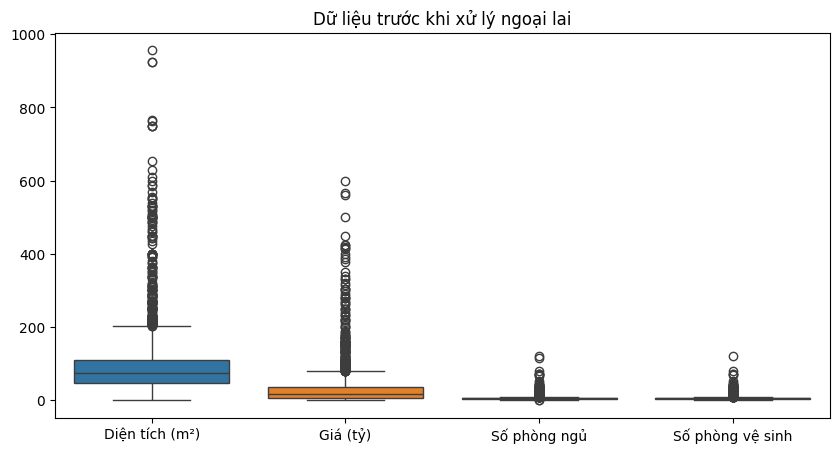

In [22]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df.select_dtypes(include=["float64", "int64"]))
plt.title("D·ªØ li·ªáu tr∆∞·ªõc khi x·ª≠ l√Ω ngo·∫°i lai")
plt.show()

In [23]:
def handle_outliers(df, factor=1.5):
    df_clean = df.copy()
    
    # Ch·ªâ x·ª≠ l√Ω c√°c c·ªôt d·∫°ng s·ªë
    numeric_cols = df_clean.select_dtypes(include=["float64", "int64"]).columns
    
    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR

        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean


In [24]:
print("Tr∆∞·ªõc khi x·ª≠ l√Ω:", df.shape)
df_clean = handle_outliers(df)
print("Sau khi x·ª≠ l√Ω:", df_clean.shape)


Tr∆∞·ªõc khi x·ª≠ l√Ω: (2435, 9)
Sau khi x·ª≠ l√Ω: (1691, 9)


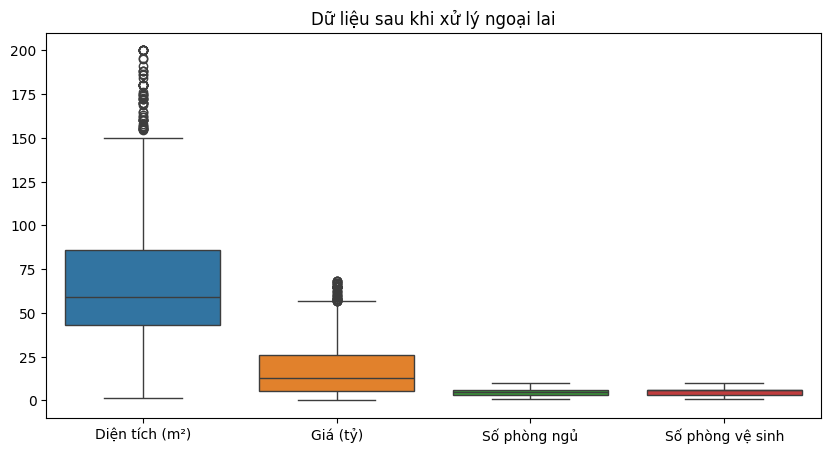

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_clean.select_dtypes(include=["float64", "int64"]))
plt.title("D·ªØ li·ªáu sau khi x·ª≠ l√Ω ngo·∫°i lai")
plt.show()


In [26]:
df_clean.to_csv("bds_clean.csv", index=False, encoding="utf-8-sig")


# Chu·∫©n h√≥a d·ªØ li·ªáu

In [27]:
from sklearn.preprocessing import MinMaxScaler

cols_scale = ["Di·ªán t√≠ch (m¬≤)", "S·ªë ph√≤ng ng·ªß", "S·ªë ph√≤ng v·ªá sinh"]
scaler = MinMaxScaler()
df_scaled = df_clean.copy()
df_scaled[cols_scale] = scaler.fit_transform(df_clean[cols_scale])

df_scaled.head()


Ng√†y ƒëƒÉng Lo·∫°i h√¨nh  Di·ªán t√≠ch (m¬≤)  Gi√° (t·ª∑)   Gi·∫•y t·ªù ph√°p l√Ω  \
0  09/10/2025  Chung c∆∞        0.239869      1.55    S·ªï ƒë·ªè/ S·ªï h·ªìng   
1  21/10/2025  Chung c∆∞        0.179461      1.79    S·ªï ƒë·ªè/ S·ªï h·ªìng   
2  21/10/2025  Chung c∆∞        0.209665      1.77    S·ªï ƒë·ªè/ S·ªï h·ªìng   
3  21/10/2025  Chung c∆∞        0.179461      1.68              Kh√°c   
4  18/10/2025  Chung c∆∞        0.194563      1.42  H·ª£p ƒë·ªìng mua b√°n   

   S·ªë ph√≤ng ng·ªß  S·ªë ph√≤ng v·ªá sinh T√¨nh tr·∫°ng n·ªôi th·∫•t  \
0      0.111111          0.000000              C∆° b·∫£n   
1      0.111111          0.555556              ƒê·∫ßy ƒë·ªß   
2      0.111111          0.555556              ƒê·∫ßy ƒë·ªß   
3      0.111111          0.555556              ƒê·∫ßy ƒë·ªß   
4      0.000000          0.000000              ƒê·∫ßy ƒë·ªß   

                                                Link  
0  https://batdongsan.com.vn/ban-can-ho-chung-cu-...  
1  https://batdongsan.com.vn/ban-can-ho-chung-cu-...  
2  https://batdongsan.com.vn/ban-can-ho-chung-cu-...  
3  https://batdongsan.com.vn/ban-can-ho-chung-cu-...  
4  https://batdongsan.com.vn/ban-can-ho-chung-cu-...

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


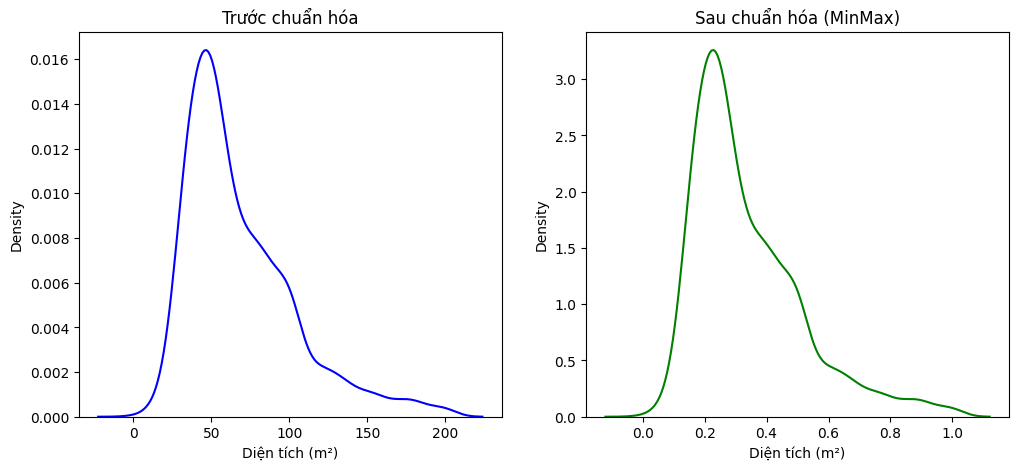

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.kdeplot(df_clean["Di·ªán t√≠ch (m¬≤)"], ax=axes[0], color="blue")
axes[0].set_title("Tr∆∞·ªõc chu·∫©n h√≥a")
sns.kdeplot(df_scaled["Di·ªán t√≠ch (m¬≤)"], ax=axes[1], color="green")
axes[1].set_title("Sau chu·∫©n h√≥a (MinMax)")
plt.show()

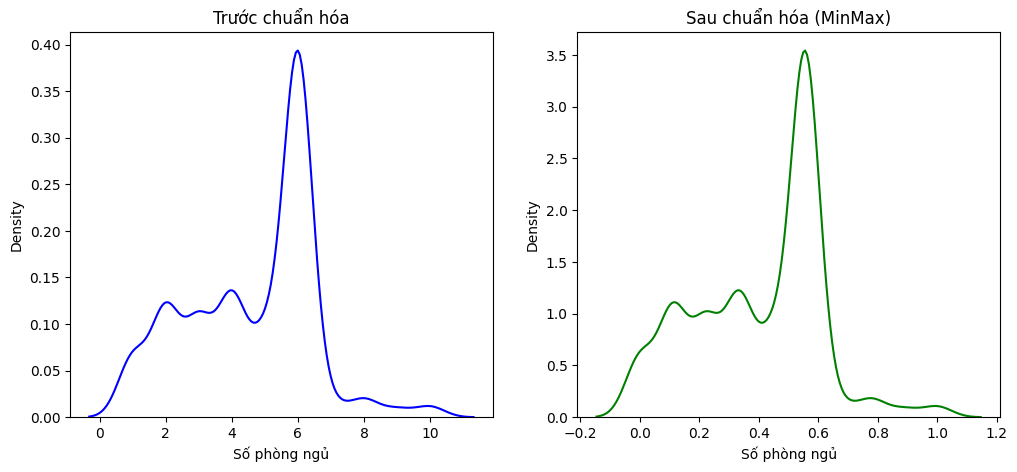

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.kdeplot(df_clean["S·ªë ph√≤ng ng·ªß"], ax=axes[0], color="blue")
axes[0].set_title("Tr∆∞·ªõc chu·∫©n h√≥a")
sns.kdeplot(df_scaled["S·ªë ph√≤ng ng·ªß"], ax=axes[1], color="green")
axes[1].set_title("Sau chu·∫©n h√≥a (MinMax)")
plt.show()

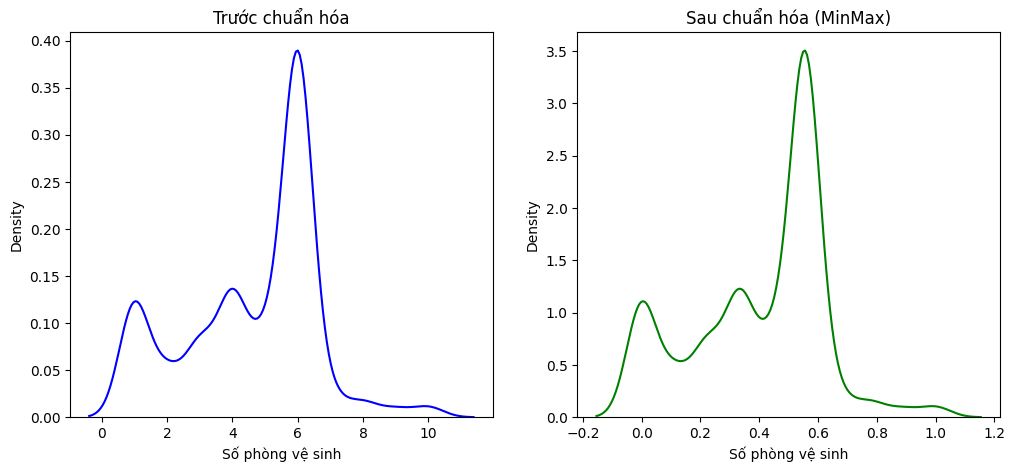

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.kdeplot(df_clean["S·ªë ph√≤ng v·ªá sinh"], ax=axes[0], color="blue")
axes[0].set_title("Tr∆∞·ªõc chu·∫©n h√≥a")
sns.kdeplot(df_scaled["S·ªë ph√≤ng v·ªá sinh"], ax=axes[1], color="green")
axes[1].set_title("Sau chu·∫©n h√≥a (MinMax)")
plt.show()

# X√¢y d·ª±ng m√¥ h√¨nh d·ª± ƒëo√°n

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [33]:
le_loai = LabelEncoder()
le_phaply = LabelEncoder()
le_noithat = LabelEncoder()

df_scaled["Lo·∫°i h√¨nh"] = df_scaled["Lo·∫°i h√¨nh"].astype(str)
df_scaled["Gi·∫•y t·ªù ph√°p l√Ω"] = df_scaled["Gi·∫•y t·ªù ph√°p l√Ω"].astype(str)
df_scaled["T√¨nh tr·∫°ng n·ªôi th·∫•t"] = df_scaled["T√¨nh tr·∫°ng n·ªôi th·∫•t"].astype(str)

df_scaled["Lo·∫°i h√¨nh (encoded)"] = le_loai.fit_transform(df_scaled["Lo·∫°i h√¨nh"])
df_scaled["Gi·∫•y t·ªù ph√°p l√Ω (encoded)"] = le_phaply.fit_transform(df_scaled["Gi·∫•y t·ªù ph√°p l√Ω"])
df_scaled["T√¨nh tr·∫°ng n·ªôi th·∫•t (encoded)"] = le_noithat.fit_transform(df_scaled["T√¨nh tr·∫°ng n·ªôi th·∫•t"])


In [34]:
cols_for_model = [
    "Lo·∫°i h√¨nh (encoded)",
    "Di·ªán t√≠ch (m¬≤)",
    "Gi·∫•y t·ªù ph√°p l√Ω (encoded)",
    "S·ªë ph√≤ng ng·ªß",
    "S·ªë ph√≤ng v·ªá sinh",
    "T√¨nh tr·∫°ng n·ªôi th·∫•t (encoded)"
]
X = df_scaled[cols_for_model]
Y = df_scaled['Gi√° (t·ª∑)']

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = model.score(X_test, Y_test)
print(f"MAE: {mae:.3f} | RMSE: {rmse:.3f} | R¬≤: {r2:.3f}")

MAE: 9.225 | RMSE: 12.806 | R¬≤: 0.371


# Bi·ªÉu ƒë·ªì so s√°nh

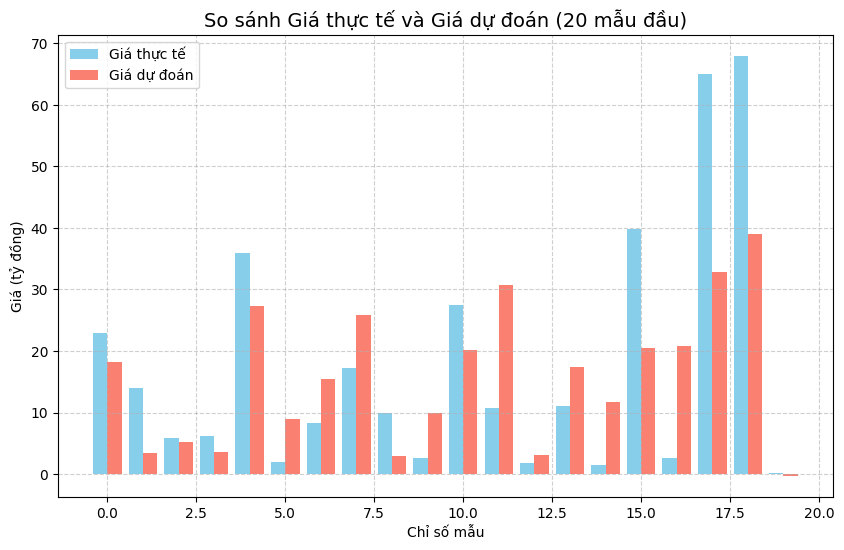

In [36]:
n = 20 
indices = np.arange(n)

plt.figure(figsize=(10,6))
plt.bar(indices - 0.2, Y_test[:n], width=0.4, label='Gi√° th·ª±c t·∫ø', color='skyblue')
plt.bar(indices + 0.2, Y_pred[:n], width=0.4, label='Gi√° d·ª± ƒëo√°n', color='salmon')

plt.title("So s√°nh Gi√° th·ª±c t·∫ø v√† Gi√° d·ª± ƒëo√°n (20 m·∫´u ƒë·∫ßu)", fontsize=14)
plt.xlabel("Ch·ªâ s·ªë m·∫´u")
plt.ylabel("Gi√° (t·ª∑ ƒë·ªìng)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



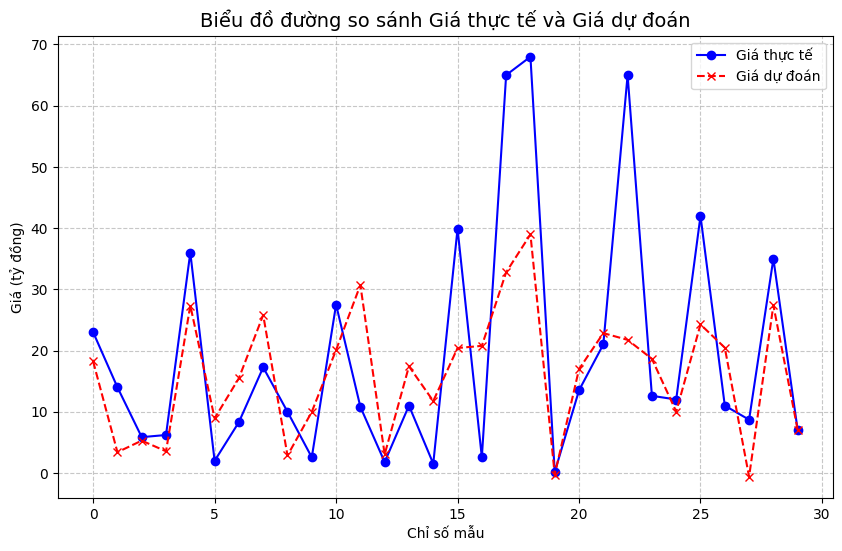

In [37]:
import matplotlib.pyplot as plt
import numpy as np

n = 30
indices = np.arange(n)

plt.figure(figsize=(10,6))

# ƒê∆∞·ªùng 1: Gi√° th·ª±c t·∫ø
plt.plot(indices, Y_test[:n], label="Gi√° th·ª±c t·∫ø", color='blue', marker='o')

# ƒê∆∞·ªùng 2: Gi√° d·ª± ƒëo√°n
plt.plot(indices, Y_pred[:n], label="Gi√° d·ª± ƒëo√°n", color='red', linestyle='--', marker='x')

plt.title("Bi·ªÉu ƒë·ªì ƒë∆∞·ªùng so s√°nh Gi√° th·ª±c t·∫ø v√† Gi√° d·ª± ƒëo√°n", fontsize=14)
plt.xlabel("Ch·ªâ s·ªë m·∫´u")
plt.ylabel("Gi√° (t·ª∑ ƒë·ªìng)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


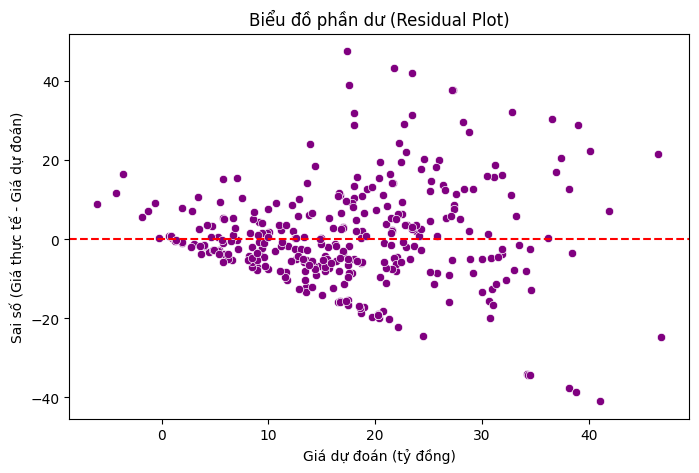

In [38]:
import seaborn as sns
residuals = Y_test - Y_pred

plt.figure(figsize=(8,5))
sns.scatterplot(x=Y_pred, y=residuals, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.title("Bi·ªÉu ƒë·ªì ph·∫ßn d∆∞ (Residual Plot)")
plt.xlabel("Gi√° d·ª± ƒëo√°n (t·ª∑ ƒë·ªìng)")
plt.ylabel("Sai s·ªë (Gi√° th·ª±c t·∫ø - Gi√° d·ª± ƒëo√°n)")
plt.show()


# X√¢y d·ª±ng giao di·ªán

In [39]:
import gradio as gr
import joblib
import numpy as np

c:\Users\QHy\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:
joblib.dump(model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le_loai, "le_loai.pkl")
joblib.dump(le_phaply, "le_phaply.pkl")
joblib.dump(le_noithat, "le_noithat.pkl")

['le_noithat.pkl']

In [41]:
model = joblib.load("model.pkl")
scaler = joblib.load("scaler.pkl")
le_loai = joblib.load("le_loai.pkl")
le_phaply = joblib.load("le_phaply.pkl")
le_noithat = joblib.load("le_noithat.pkl")


In [42]:
def predict(loai_hinh, dien_tich, phap_ly, phong_ngu, phong_vs, noi_that):
    # Encode input
    loai_enc = le_loai.transform([loai_hinh])[0]
    phaply_enc = le_phaply.transform([phap_ly])[0]
    noithat_enc = le_noithat.transform([noi_that])[0]
    
    # Scale continuous inputs only
    scaled_continuous = scaler.transform([[dien_tich, phong_ngu, phong_vs]])[0]
    dien_tich_s, phong_ngu_s, phong_vs_s = scaled_continuous
    
    # Combine features
    features = np.array([[loai_enc, dien_tich_s, phaply_enc, phong_ngu_s, phong_vs_s, noithat_enc]])
    
    predicted = model.predict(features)[0]
    return f"üí∞ D·ª± ƒëo√°n gi√°: {predicted:.2f} t·ª∑ ƒë·ªìng"

In [43]:
iface = gr.Interface(
    fn=predict,
    inputs=[
        gr.Dropdown(["Nh√† ri√™ng", "Nh√† m·∫∑t ph·ªë", "Chung c∆∞", "Bi·ªát th·ª±", "Shophouse"], label="Lo·∫°i h√¨nh"),
        gr.Number(label="Di·ªán t√≠ch (m¬≤)", value=80),
        gr.Dropdown(["S·ªï ƒë·ªè", "S·ªï h·ªìng", "H·ª£p ƒë·ªìng mua b√°n", "ƒêang ch·ªù s·ªï", "ƒê·∫ßy ƒë·ªß ph√°p l√Ω kh√°c"], label="Gi·∫•y t·ªù ph√°p l√Ω"),
        gr.Slider(0, 10, 2, step=1, label="S·ªë ph√≤ng ng·ªß"),
        gr.Slider(0, 10, 1, step=1, label="S·ªë ph√≤ng v·ªá sinh"),
        gr.Dropdown(["ƒê·∫ßy ƒë·ªß", "C∆° b·∫£n", "Kh√¥ng n·ªôi th·∫•t", "B√†n giao th√¥"], label="T√¨nh tr·∫°ng n·ªôi th·∫•t"),
    ],
    outputs="text",
    title="üè† D·ª± ƒëo√°n gi√° nh√† b·∫•t ƒë·ªông s·∫£n",
    description="Nh·∫≠p th√¥ng tin chi ti·∫øt ƒë·ªÉ d·ª± ƒëo√°n gi√° nh√† (ƒë∆°n v·ªã: t·ª∑ ƒë·ªìng).",
    theme="gradio/soft"
)

iface.launch(inline=True)

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
